In [16]:
%pip install nnfs


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(probabilities)
np.sum(probabilities, axis=1)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [19]:
class Activation_ReLu:
   def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [20]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

In [21]:
class Activation_Softmax:
  def forward(self, inputs):

    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilites = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilites

In [22]:
X, Y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLu()

dense2 = Layer_Dense(3, 3)

activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


In [23]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                          [0.1, 0.5, 0.4],
                          [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


In [24]:
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets]))
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [25]:
y_true_check = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0]
])
y_pred_clipped_check = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

A = y_true_check*y_pred_clipped_check
B = np.sum(A, axis=1)
C = -np.log(B)

print(C)
print(np.mean(C))

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [26]:
class Loss:

  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [27]:
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [28]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
  [0.1, 0.5, 0.4],
  [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
  [0, 1, 0],
  [0, 1, 0]])
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [29]:
X, Y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLu()

dense2 = Layer_Dense(3, 3)

activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)

activation2.forward(dense2.output)
loss = loss_function.calculate(activation2.output, Y)
print('loss:', loss)

predictions = np.argmax(activation2.output, axis=1)
if len(Y.shape) == 2:
  Y = np.argmax(Y, axis=1)
accuracy = np.mean(predictions==Y)
print("acc:", accuracy)

loss: 1.0986081
acc: 0.33666666666666667


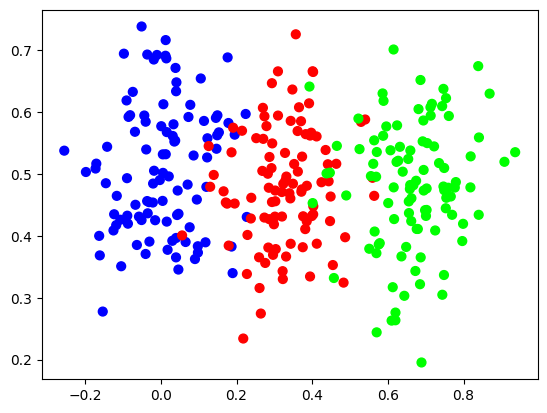

In [30]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, Y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='brg')
plt.show()

In [31]:
X, Y = vertical_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLu()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
  dense1.weights = 0.05*np.random.randn(2, 3)
  dense1.biases = 0.05*np.random.randn(1, 3)
  dense2.weights = 0.05*np.random.randn(3, 3)
  dense2.biases = 0.05*np.random.randn(1, 3)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, Y)
  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions == Y)

  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_weights = dense2.biases.copy()
    lowest_loss = loss


New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.095428 acc: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 acc: 0.3333333333333333
